In [256]:
import numpy as np
import pandas as pd
import os
import gc
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [257]:
DATA_DIR = r'C:\Projects\TRANSIMS\Simulation'
# SNAPSHOT_FILE = os.path.join(DATA_DIR, 'MESO_Snapshot.csv')
SNAPSHOT_FILE = os.path.join(DATA_DIR, 'MACRO_Snapshot.csv')


In [258]:
def expand_data(df):
    """
    Convert to time stamps
    
    """
    
    columns = df.columns.tolist()
    if 'TIME' in columns:
        df['TIMESTAMP'] = pd.to_datetime(df.TIME.values, infer_datetime_format=True)
       

In [259]:
def read_snapshot_file(snapshot_file, chunksize=5_000_000):

    if not os.path.isfile(snapshot_file):
        print('Error: snapshot file not Found {:s}'.format(snapshot_file))
        return
    
    dtypes = {
        'HHOLD': np.int32, 
        'VEHICLE': np.uint8,
        'TIME': str,
        'LINK': np.uint32,
        'DIR': np.uint8,
        'LANE': str,
        'OFFSET': np.float32,
        'SPEED': np.float32,
        'PASSENGERS': np.uint8,
        'TYPE': np.uint8,
    }
    
    usecols = tuple(dtypes.keys())
    
    df_list = []
    
    for df_chunk in tqdm(pd.read_csv(snapshot_file, usecols=usecols, dtype=dtypes, chunksize=chunksize)):
    
#         expand_data(df_chunk)
        df_list.append(df_chunk) 
    
    df = pd.concat(df_list)
    del df_list
    gc.collect()
    return df

In [260]:
df_snapshot = read_snapshot_file(SNAPSHOT_FILE)
df_snapshot.head()

,HHOLD,VEHICLE,TIME,LINK,DIR,LANE,OFFSET,SPEED,PASSENGERS,TYPE
0,2266028,1,6:00,804324,0,2,449.899994,41.400002,0,1
1,1535444,1,6:00,804324,0,2,474.899994,58.000000,0,1
2,1537063,1,6:00,804324,0,1,474.899994,58.000000,0,1
3,1522621,1,6:00,804324,0,1,649.900024,58.000000,0,1
4,386197,1,6:00,804324,0,3,774.900024,55.000000,0,1


In [261]:
df_snapshot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983835 entries, 0 to 983834
Data columns (total 10 columns):
HHOLD         983835 non-null int32
VEHICLE       983835 non-null uint8
TIME          983835 non-null object
LINK          983835 non-null uint32
DIR           983835 non-null uint8
LANE          983835 non-null object
OFFSET        983835 non-null float32
SPEED         983835 non-null float32
PASSENGERS    983835 non-null uint8
TYPE          983835 non-null uint8
dtypes: float32(2), int32(1), object(2), uint32(1), uint8(4)
memory usage: 33.8+ MB


### Analyze snapshots for one link

#### Attach timestamps

In [262]:
select_link_id = 3000187
df_snapshot_select = df_snapshot.loc[df_snapshot.LINK == select_link_id, df_snapshot.columns]

In [263]:
df_snapshot_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150475 entries, 155 to 983834
Data columns (total 10 columns):
HHOLD         150475 non-null int32
VEHICLE       150475 non-null uint8
TIME          150475 non-null object
LINK          150475 non-null uint32
DIR           150475 non-null uint8
LANE          150475 non-null object
OFFSET        150475 non-null float32
SPEED         150475 non-null float32
PASSENGERS    150475 non-null uint8
TYPE          150475 non-null uint8
dtypes: float32(2), int32(1), object(2), uint32(1), uint8(4)
memory usage: 6.3+ MB


In [264]:
# to_datetime is very expensive especially when the time strings are not in uniform format
expand_data(df_snapshot_select)

In [265]:
df_snapshot_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150475 entries, 155 to 983834
Data columns (total 11 columns):
HHOLD         150475 non-null int32
VEHICLE       150475 non-null uint8
TIME          150475 non-null object
LINK          150475 non-null uint32
DIR           150475 non-null uint8
LANE          150475 non-null object
OFFSET        150475 non-null float32
SPEED         150475 non-null float32
PASSENGERS    150475 non-null uint8
TYPE          150475 non-null uint8
TIMESTAMP     150475 non-null datetime64[ns]
dtypes: datetime64[ns](1), float32(2), int32(1), object(2), uint32(1), uint8(4)
memory usage: 7.5+ MB


In [266]:
df_snapshot_select.head()

,HHOLD,VEHICLE,TIME,LINK,DIR,LANE,OFFSET,SPEED,PASSENGERS,TYPE,TIMESTAMP
155,187687,1,6:00,3000187,0,1,824.900024,58.000000,0,2,2019-09-19 06:00:00
156,2450375,1,6:00,3000187,0,1,1174.900024,58.000000,0,1,2019-09-19 06:00:00
157,2256362,1,6:00,3000187,0,1,1199.900024,51.099998,0,1,2019-09-19 06:00:00
158,2255619,1,6:00,3000187,0,1,1224.900024,43.799999,0,1,2019-09-19 06:00:00
159,2023290,1,6:00,3000187,0,1,1249.900024,58.000000,0,1,2019-09-19 06:00:00


In [267]:
df_snapshot_select.describe()

,HHOLD,VEHICLE,LINK,DIR,OFFSET,SPEED,PASSENGERS,TYPE
count,1.504750e+05,150475.0,150475.0,150475.0,150475.000000,150475.000000,150475.0,150475.000000
mean,4.980232e+06,1.0,3000187.0,0.0,1309.646973,45.496864,0.0,1.755873
std,5.098977e+06,0.0,0.0,0.0,710.359497,9.322365,0.0,1.206337
min,1.516000e+03,1.0,3000187.0,0.0,49.900002,10.600000,0.0,1.000000
25%,1.379176e+06,1.0,3000187.0,0.0,724.900024,38.400002,0.0,1.000000
50%,2.054103e+06,1.0,3000187.0,0.0,1249.900024,43.799999,0.0,1.000000
75%,1.130522e+07,1.0,3000187.0,0.0,1949.900024,54.000000,0.0,2.000000
max,1.444795e+07,1.0,3000187.0,0.0,2481.600098,59.299999,0.0,5.000000


#### Compute 1-min average density

1-min density is computed as the density averaged over 60 seconds. 

In [268]:
df_density = pd.DataFrame(df_snapshot_select.groupby('TIMESTAMP')['HHOLD'].count()).rename(columns={'HHOLD':'VEHICLE'})
df_density.head()

,VEHICLE
TIMESTAMP,
2019-09-19 06:00:00,25
2019-09-19 06:00:05,28
2019-09-19 06:00:10,17
2019-09-19 06:00:15,16
2019-09-19 06:00:20,19


In [269]:
df_density.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2019-09-19 06:00:00 to 2019-09-19 18:59:55
Data columns (total 1 columns):
VEHICLE    5030 non-null int64
dtypes: int64(1)
memory usage: 78.6 KB


In [270]:
def calculate_density(df, freq='60S'):
    return df.resample(freq).mean()

In [287]:
df_density_1 = df_density.loc['2019-09-19 06:00:00':'2019-09-19 09:00:00']
df_density_2 = df_density.loc['2019-09-19 15:00:00':'2019-09-19 19:00:00']

In [288]:
df_density_1_1min = calculate_density(df_density_1)
df_density_1_1min.describe()

,VEHICLE
count,180.000000
mean,36.454181
std,16.912343
min,2.083333
25%,27.395833
50%,34.958333
75%,42.937500
max,106.166667


In [289]:
df_density_2_1min = calculate_density(df_density_2)
df_density_2_1min.describe()

,VEHICLE
count,240.000000
mean,24.920833
std,6.039193
min,11.250000
25%,20.562500
50%,24.916667
75%,28.770833
max,49.416667


#### Compute 1-min average speed
1-min speed is computed as cumulative distance divided by time

In [290]:
df_speed = pd.DataFrame(df_snapshot_select.groupby('TIMESTAMP')['SPEED'].mean())
df_speed.head()

,SPEED
TIMESTAMP,
2019-09-19 06:00:00,44.436001
2019-09-19 06:00:05,44.510715
2019-09-19 06:00:10,48.982353
2019-09-19 06:00:15,48.181252
2019-09-19 06:00:20,47.789474


In [291]:
def calculate_speed(df, freq='60S'):
    return df.resample(freq).mean()

In [292]:
df_speed_1 = df_speed.loc['2019-09-19 06:00:00':'2019-09-19 07:00:00']
df_speed_2 = df_speed.loc['2019-09-19 08:00:00':'2019-09-19 09:00:00']

In [293]:
df_speed_1_1min = calculate_speed(df_speed_1)
df_speed_1_1min.describe()

,SPEED
count,61.000000
mean,45.588467
std,1.303889
min,43.483273
25%,44.627335
50%,45.450153
75%,46.548801
max,49.316185


In [294]:
df_speed_2_1min = calculate_speed(df_speed_2)
df_speed_2_1min.describe()

,SPEED
count,60.000000
mean,47.229687
std,3.912707
min,43.434315
25%,44.519310
50%,45.573721
75%,47.110996
max,57.584999


In [295]:
number_of_lanes = 3
length = 2481.6
jam_density = length / 25
df_speed_density_1_1min = df_speed_1_1min.copy()
df_speed_density_1_1min['DENSITY'] = df_density_1_1min / number_of_lanes
df_speed_density_1_1min.describe()

,SPEED,DENSITY
count,61.000000,61.000000
mean,45.588467,12.484973
std,1.303889,5.243437
min,43.483273,3.833333
25%,44.627335,8.638889
50%,45.450153,11.305556
75%,46.548801,15.666667
max,49.316185,26.777778


(0, 70)

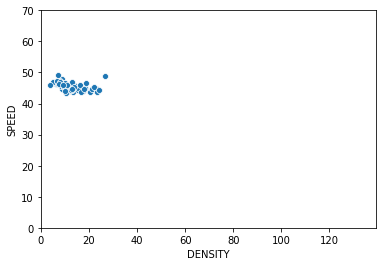

In [296]:
ax = sns.scatterplot(x="DENSITY", y="SPEED", data=df_speed_density_1_1min)
ax.set_xlim([0, jam_density+40])
ax.set_ylim([0, 70])

In [297]:
df_speed_density_2_1min = df_speed_2_1min.copy()
df_speed_density_2_1min['DENSITY'] = df_density_2_1min / number_of_lanes
df_speed_density_2_1min.describe()

,SPEED,DENSITY
count,60.000000,0.0
mean,47.229687,NaN
std,3.912707,NaN
min,43.434315,NaN
25%,44.519310,NaN
50%,45.573721,NaN
75%,47.110996,NaN
max,57.584999,NaN


(0, 70)

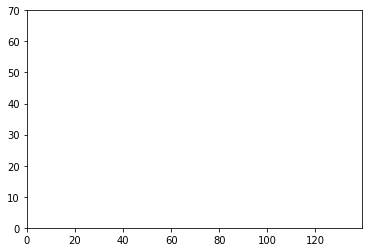

In [298]:
ax = sns.scatterplot(x="DENSITY", y="SPEED", data=df_speed_density_2_1min)
ax.set_xlim([0, jam_density+40])
ax.set_ylim([0, 70])

#### Examine the lowest speed

In [299]:
df_speed_density_2_1min.loc[(df_speed_density_2_1min.DENSITY > 90) & (df_speed_density_2_1min.SPEED < 30)]

,SPEED,DENSITY
TIMESTAMP,,


In [300]:
df_1sec = df_snapshot_select.set_index('TIMESTAMP')
df_1sec.loc['2019-09-19 08:29:00'].sort_values(by=['OFFSET','TIME'])

,HHOLD,VEHICLE,TIME,LINK,DIR,LANE,OFFSET,SPEED,PASSENGERS,TYPE
TIMESTAMP,,,,,,,,,,
2019-09-19 08:29:00,1541977,1,8:29,3000187,0,3,49.900002,59.299999,0,1
2019-09-19 08:29:00,183724,1,8:29,3000187,0,1,174.899994,58.000000,0,1
2019-09-19 08:29:00,1381650,1,8:29,3000187,0,2,199.899994,59.299999,0,2
2019-09-19 08:29:00,1539057,1,8:29,3000187,0,3,224.899994,59.299999,0,1
2019-09-19 08:29:00,2035221,1,8:29,3000187,0,1,299.899994,59.299999,0,1
2019-09-19 08:29:00,2237154,1,8:29,3000187,0,2,324.899994,59.299999,0,1
2019-09-19 08:29:00,2024994,1,8:29,3000187,0,1,324.899994,59.299999,0,1
2019-09-19 08:29:00,11295392,1,8:29,3000187,0,3,349.899994,59.299999,0,1
2019-09-19 08:29:00,1751160,1,8:29,3000187,0,2,349.899994,59.299999,0,2


In [301]:
df_1sec.loc[(df_1sec.LANE == '3') & (df_1sec.index == '2019-09-18 06:50:00')]

,HHOLD,VEHICLE,TIME,LINK,DIR,LANE,OFFSET,SPEED,PASSENGERS,TYPE
TIMESTAMP,,,,,,,,,,


In [302]:
df_snapshot.loc[(df_snapshot.HHOLD == 2254972) & (df_snapshot.LINK == select_link_id)]

,HHOLD,VEHICLE,TIME,LINK,DIR,LANE,OFFSET,SPEED,PASSENGERS,TYPE
